<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/Appendix_Retail_Super_Store_Version_21_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [32]:
from datetime import datetime
import pytz
print("\033[1m"+'ॐ श्री गणेशाय नमः'+"\033[0m")
print(datetime.now(pytz.timezone('Asia/Calcutta')))

ॐ श्री गणेशाय नमः
2023-10-06 13:41:00.886290+05:30


#Retail Super Store Exercise
see https://pymanager.blogspot.com/p/retail-super-store.html for explanations

##Download Data
https://drive.google.com/file/d/1HDeOmMfag6VX_oei0-Eqsc62unpBRlu2/view?usp=sharing  or <br>
https://community.tableau.com/servlet/JiveServlet/downloadBody/1236-102-2-15278/Sample%20-%20Superstore.xls

In [1]:
#!wget -O Superstore.xls https://community.tableau.com/servlet/JiveServlet/downloadBody/1236-102-2-15278/Sample%20-%20Superstore.xls
#!gdown https://drive.google.com/uc?id=1HDeOmMfag6VX_oei0-Eqsc62unpBRlu2
!wget -q -O Superstore.xls https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/Superstore.xls
!wget -q -O Superstore.csv https://raw.githubusercontent.com/Praxis-QR/PythonForManagers/main/Data/Superstore.csv

##Read Excel Data into Pandas Dataframe

In [2]:
!pip -q install --upgrade xlrd   # https://stackoverflow.com/questions/62834014/error-pandas-requires-version-1-1-0-or-newer-of-xlrd-version-1-0-0-curre

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dfSS_0 = pd.read_excel("Superstore.xls")
#dfSS_0 = pd.read_csv("Superstore.csv")
dfSS_0.shape

(9994, 21)

In [4]:
dfSS_0 = pd.read_excel("Superstore.xls")
dfSS_0.shape

(9994, 21)

In [6]:
dfSS_0.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Remove unwanted columns
dfSS_0 = dfSS_0.drop(columns=["Row ID","Customer ID", "Customer Name"])

#Show first two rows
dfSS_0.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
#check for null values
dfSS_0.isnull().values.any()

False

##Analyzing One Kind of Data (Sales or Profits)

In [9]:
#Reduce the quantity of data
dfSS_1S = dfSS_0[["City","State","Category","Sales"]].copy()
dfSS_1S.head()

,City,State,Category,Sales
0,Henderson,Kentucky,Furniture,261.9600
1,Henderson,Kentucky,Furniture,731.9400
2,Los Angeles,California,Office Supplies,14.6200
3,Fort Lauderdale,Florida,Furniture,957.5775
4,Fort Lauderdale,Florida,Office Supplies,22.3680


In [10]:
#Reduce the quantity of data
dfSS_1P = dfSS_0[["City","State","Category","Profit"]].copy()
dfSS_1P.head()

,City,State,Category,Profit
0,Henderson,Kentucky,Furniture,41.9136
1,Henderson,Kentucky,Furniture,219.5820
2,Los Angeles,California,Office Supplies,6.8714
3,Fort Lauderdale,Florida,Furniture,-383.0310
4,Fort Lauderdale,Florida,Office Supplies,2.5164


In [11]:
dfSS_1S["Sales"].sum().round(2)

2297200.86

In [12]:
#Show ONLY few states
dfSS_1S[dfSS_1S["State"] == "Kentucky"]

,City,State,Category,Sales
0,Henderson,Kentucky,Furniture,261.96
1,Henderson,Kentucky,Furniture,731.94
418,Richmond,Kentucky,Office Supplies,5.78
538,Henderson,Kentucky,Office Supplies,152.94
539,Henderson,Kentucky,Furniture,283.92
...,...,...,...,...
9333,Georgetown,Kentucky,Office Supplies,14.20
9462,Louisville,Kentucky,Furniture,701.96
9785,Louisville,Kentucky,Office Supplies,48.81
9911,Richmond,Kentucky,Office Supplies,115.36


In [13]:
#Show ONLY few states
dfSS_1S[dfSS_1S["State"] == "Kentucky"]["Sales"].sum().round(2)

36591.75

In [14]:
#Data from either of two states
#Note the OR condition joining the clauses
dfSS_1S[(dfSS_1S["State"] == "Kentucky") | (dfSS_1S["State"] == "Alabama")]

,City,State,Category,Sales
0,Henderson,Kentucky,Furniture,261.96
1,Henderson,Kentucky,Furniture,731.94
79,Decatur,Alabama,Office Supplies,208.16
80,Decatur,Alabama,Office Supplies,16.74
418,Richmond,Kentucky,Office Supplies,5.78
...,...,...,...,...
9489,Huntsville,Alabama,Office Supplies,197.05
9669,Decatur,Alabama,Office Supplies,14.94
9785,Louisville,Kentucky,Office Supplies,48.81
9911,Richmond,Kentucky,Office Supplies,115.36


In [15]:
#Data from either of two states
#Note the OR condition joining the clauses
dfSS_1S[(dfSS_1S["State"] == "Kentucky") | (dfSS_1S["State"] == "Alabama")]["Sales"].sum().round(2)

56102.39

In [16]:
#Placing Two Conditions
dfSS_1S[(dfSS_1S["State"] == "Kentucky") & (dfSS_1S["Category"] == "Furniture")]  # Note the AND operator

,City,State,Category,Sales
0,Henderson,Kentucky,Furniture,261.96
1,Henderson,Kentucky,Furniture,731.94
539,Henderson,Kentucky,Furniture,283.92
586,Richmond,Kentucky,Furniture,70.98
829,Florence,Kentucky,Furniture,301.96
847,Louisville,Kentucky,Furniture,287.94
998,Henderson,Kentucky,Furniture,24.10
999,Henderson,Kentucky,Furniture,33.11
1841,Bowling Green,Kentucky,Furniture,140.81
2003,Louisville,Kentucky,Furniture,304.45


In [17]:
dfSS_1S[(dfSS_1S["State"] == "Kentucky") & (dfSS_1S["Category"] == "Furniture")]["Sales"].sum().round(2)

12126.84

##Grouping Data

In [18]:
#Group BY
dfSS_RSP = dfSS_0.groupby(by=["Region"])[["Region","Sales","Profit"]].sum().round()
dfSS_RSP

<ipython-input-18-f2283843cf94>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSS_RSP = dfSS_0.groupby(by=["Region"])[["Region","Sales","Profit"]].sum().round()


,Sales,Profit
Region,,
Central,501240.0,39706.0
East,678781.0,91523.0
South,391722.0,46749.0
West,725458.0,108418.0


<Axes: xlabel='Region'>

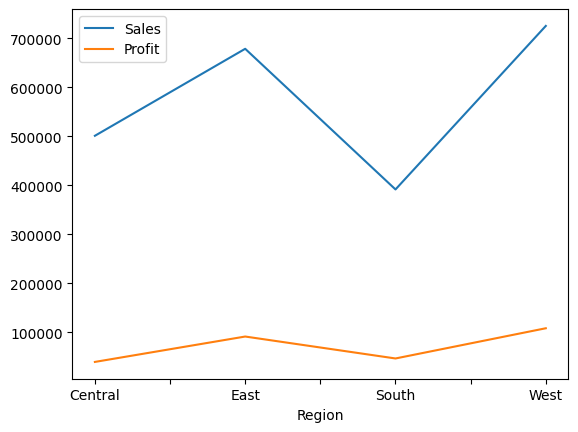

In [19]:
dfSS_RSP.plot()

In [20]:
#dfSS_RSP= dfSS_RSP.reset_index(level=0, inplace=True)
#dfSS_RSP

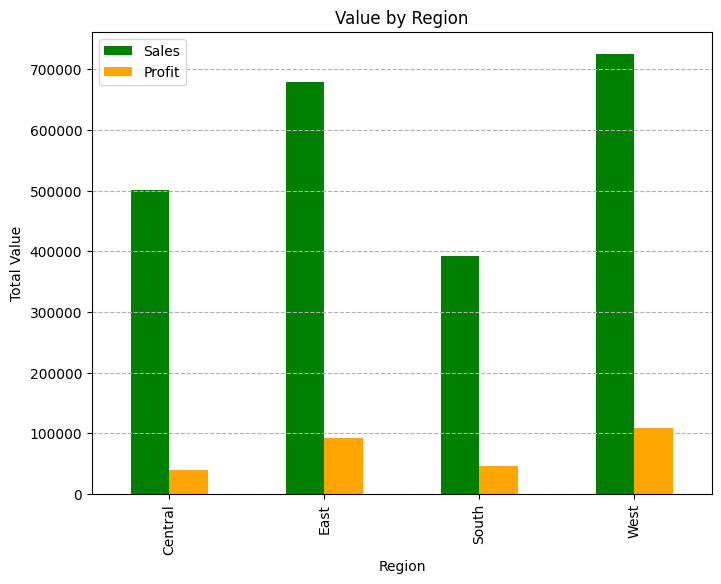

In [21]:
# Plotting directly from DataFrames with Pandas
dfSS_RSP.plot(
    y=['Sales', 'Profit'],
    kind='bar',
    legend=False,
    color=['green','orange'],
    figsize=(8,6)
)
# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Total Value')
plt.xlabel("Region")
plt.title("Value by Region")
plt.legend()
plt.gca().yaxis.grid(linestyle='--')

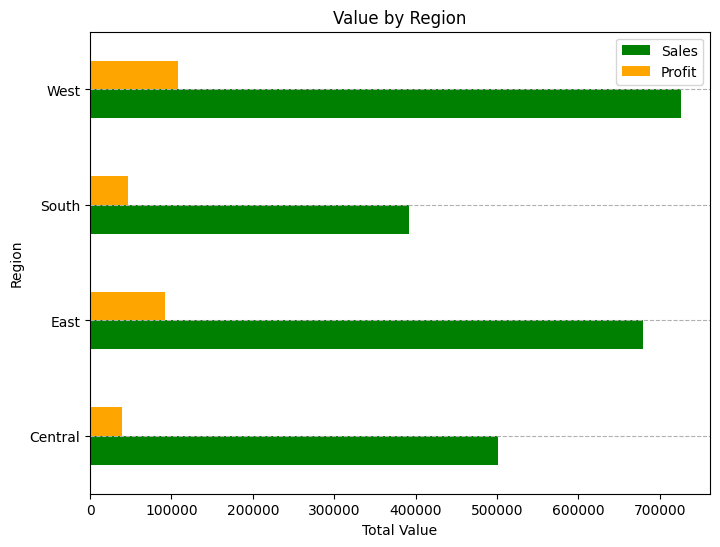

In [22]:
dfSS_RSP.plot(
    y=['Sales', 'Profit'],
    kind='barh',
    legend=False,
    color=['green','orange'],
    figsize=(8,6)
)
# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Region')
plt.xlabel("Total Value")
plt.title("Value by Region")
plt.legend()
plt.gca().yaxis.grid(linestyle='--')

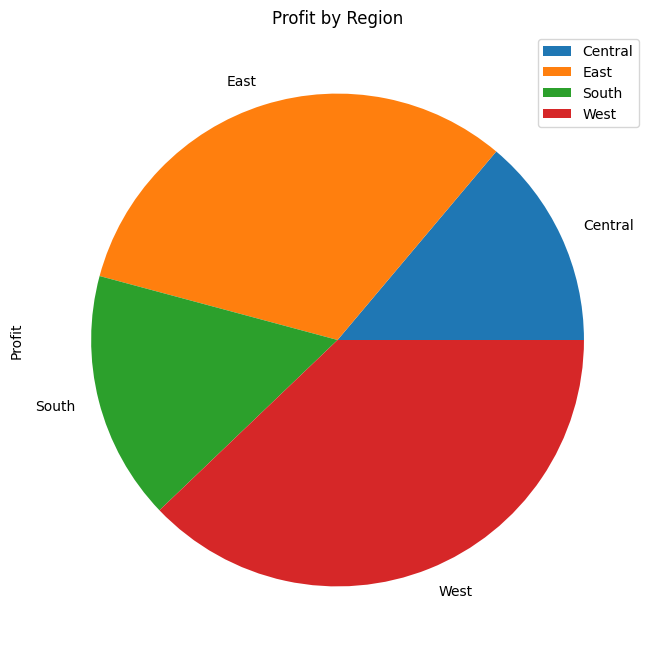

In [23]:
dfSS_RSP.plot(
    kind='pie',
    y = 'Profit',
    subplots=True,
    legend=False,
    figsize=(12,8)
)

plt.title("Profit by Region")
plt.legend()



array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>], dtype=object)

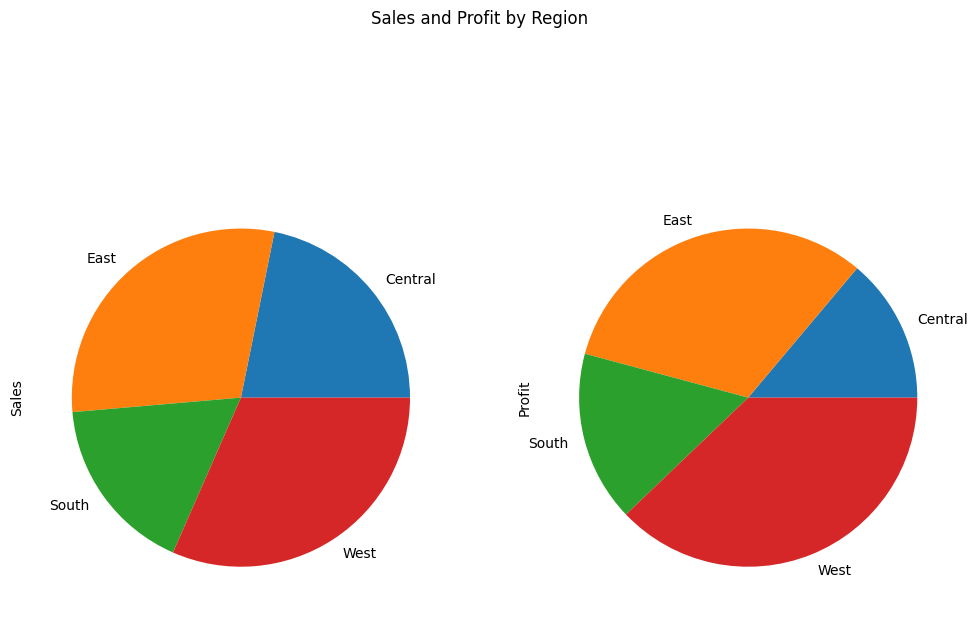

In [24]:
dfSS_RSP.plot(
    kind='pie',
    subplots=True,
    legend = False,
    figsize=(12,8),
    title = 'Sales and Profit by Region'
)


In [25]:
#Group BY
dfSS_0.groupby("Sub-Category")["Sub-Category","Sales","Profit"].sum().round()

<ipython-input-25-7913c64f2fcc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfSS_0.groupby("Sub-Category")["Sub-Category","Sales","Profit"].sum().round()
<ipython-input-25-7913c64f2fcc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSS_0.groupby("Sub-Category")["Sub-Category","Sales","Profit"].sum().round()


,Sales,Profit
Sub-Category,,
Accessories,167380.0,41937.0
Appliances,107532.0,18138.0
Art,27119.0,6528.0
Binders,203413.0,30222.0
Bookcases,114880.0,-3473.0
Chairs,328449.0,26590.0
Copiers,149528.0,55618.0
Envelopes,16476.0,6964.0
Fasteners,3024.0,950.0


In [26]:
#Group BY two levels
dfSS_0.groupby(["Region","Sub-Category"])[["Region","Sub-Category","Sales","Profit"]].sum().round()

<ipython-input-26-e41ab49fa2dc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSS_0.groupby(["Region","Sub-Category"])[["Region","Sub-Category","Sales","Profit"]].sum().round()


Sales   Profit
Region  Sub-Category                  
Central Accessories   33956.0   7252.0
        Appliances    23582.0  -2639.0
        Art            5765.0   1195.0
        Binders       56923.0  -1044.0
        Bookcases     24157.0  -1998.0
...                       ...      ...
West    Paper         26664.0  12119.0
        Phones        98684.0   9111.0
        Storage       70533.0   8645.0
        Supplies      18127.0    626.0
        Tables        84755.0   1483.0

[68 rows x 2 columns]

In [27]:
#Group BY two levels
dfSS_0[dfSS_0["Region"] == "Central"].groupby(["Region","Sub-Category"])[["Region","Sub-Category","Sales","Profit"]].sum().round()

<ipython-input-27-9c1b4904abb1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSS_0[dfSS_0["Region"] == "Central"].groupby(["Region","Sub-Category"])[["Region","Sub-Category","Sales","Profit"]].sum().round()


Sales   Profit
Region  Sub-Category                  
Central Accessories   33956.0   7252.0
        Appliances    23582.0  -2639.0
        Art            5765.0   1195.0
        Binders       56923.0  -1044.0
        Bookcases     24157.0  -1998.0
        Chairs        85231.0   6593.0
        Copiers       37260.0  15609.0
        Envelopes      4637.0   1778.0
        Fasteners       778.0    237.0
        Furnishings   15254.0  -3906.0
        Labels         2451.0   1073.0
        Machines      26797.0  -1486.0
        Paper         17492.0   6972.0
        Phones        72403.0  12323.0
        Storage       45930.0   1970.0
        Supplies       9467.0   -662.0
        Tables        39155.0  -3560.0

##Data Transformation

In [28]:
#Make a copy of the data
dfSS_2 = dfSS_0[["Order Date","State","Region","Category","Sales","Profit"]].copy()
dfSS_2.head()

,Order Date,State,Region,Category,Sales,Profit
0,2016-11-08,Kentucky,South,Furniture,261.9600,41.9136
1,2016-11-08,Kentucky,South,Furniture,731.9400,219.5820
2,2016-06-12,California,West,Office Supplies,14.6200,6.8714
3,2015-10-11,Florida,South,Furniture,957.5775,-383.0310
4,2015-10-11,Florida,South,Office Supplies,22.3680,2.5164


In [29]:
# Extracting Month, Year from DateTime
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

dfSS_2['month'] = pd.DatetimeIndex(dfSS_2['Order Date']).month
dfSS_2['year'] = pd.DatetimeIndex(dfSS_2['Order Date']).year
dfSS_2.head()

,Order Date,State,Region,Category,Sales,Profit,month,year
0,2016-11-08,Kentucky,South,Furniture,261.9600,41.9136,11,2016
1,2016-11-08,Kentucky,South,Furniture,731.9400,219.5820,11,2016
2,2016-06-12,California,West,Office Supplies,14.6200,6.8714,6,2016
3,2015-10-11,Florida,South,Furniture,957.5775,-383.0310,10,2015
4,2015-10-11,Florida,South,Office Supplies,22.3680,2.5164,10,2015


In [30]:
#Group BY
dfSS_2.groupby("month")[["Sales","Profit"]].sum()

,Sales,Profit
month,,
1,94924.8356,9134.4461
2,59751.2514,10294.6107
3,205005.4888,28594.6872
4,137762.1286,11587.4363
5,155028.8117,22411.3078
6,152718.6793,21285.7954
7,147238.0970,13832.6648
8,159044.0630,21776.9384
9,307649.9457,36857.4753


<Axes: xlabel='month'>

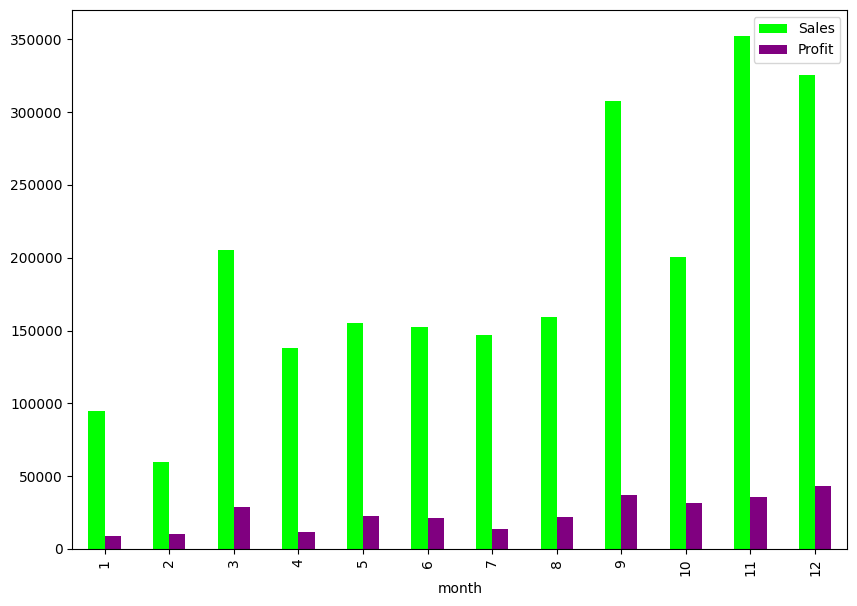

In [31]:
dfSS_2.groupby("month")[["Sales","Profit"]].sum().plot(
    y=['Sales', 'Profit'],
    kind='bar',
    legend=True,
    color=['lime','purple'],
    figsize=(10,7)
)

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself.
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)